In [1]:
import pandas as pd
import numpy as np
from sklearn.compose import make_column_selector, ColumnTransformer, make_column_transformer
# sklearn.compose: The sklearn.compose module is a submodule of the sklearn library for machine learning in Python. It provides functions for creating complex preprocessing and modeling pipelines.
from sklearn.preprocessing import OneHotEncoder,StandardScaler,PolynomialFeatures,RobustScaler
#sklearn.preprocessing: The sklearn.preprocessing module is a submodule of the sklearn library that provides functions for preprocessing data, such as scaling and normalizing features, imputing missing values, and encoding categorical variables.
from sklearn.linear_model import Ridge,LinearRegression,Lasso, ElasticNet
# sklearn.linear_model: The sklearn.linear_model module is a submodule of the sklearn library that provides functions for fitting linear models for regression and classification.
from sklearn.pipeline import make_pipeline
# sklearn.pipeline: The sklearn.pipeline module is a submodule of the sklearn library that provides functions for creating and working with pipelines of transformers and models.
from sklearn.model_selection import train_test_split,GridSearchCV,learning_curve, RandomizedSearchCV, cross_val_score, KFold
# sklearn.model_selection: The sklearn.model_selection module is a submodule of the sklearn library that provides functions for splitting data into training and test sets, evaluating models using cross-validation, and hyperparameter tuning.
from sklearn.dummy import DummyRegressor
# sklearn.dummy: The sklearn.dummy module is a submodule of the sklearn library that provides simple dummy models for regression and classification.

from sklearn.metrics import *
from scipy.stats import probplot
import matplotlib.pyplot as plt
import seaborn as sns
import my_functions
 


In [2]:
# chargement et affichage des données
data = pd.read_csv('../data.csv')
def classify_bmi(row):
    if row["bmi"] < 25:
        return "normal"
    elif row["bmi"] < 30:
        return "overweight"
    else:
        return "obese"

data["bmi_class"] = data.apply(classify_bmi, axis=1)

# Remove duplicates from the 'data' DataFrame
df = data.drop_duplicates()


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1337 entries, 0 to 1337
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1337 non-null   int64  
 1   sex        1337 non-null   object 
 2   bmi        1337 non-null   float64
 3   children   1337 non-null   int64  
 4   smoker     1337 non-null   object 
 5   region     1337 non-null   object 
 6   charges    1337 non-null   float64
 7   bmi_class  1337 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 94.0+ KB


In [4]:
# Select the 'charges' column and store it in a separate DataFrame
y = df[['charges']]
# Drop the 'charges' column from the 'data' DataFrame and store the rest of the columns in a separate DataFrame
X = df.drop(columns=['charges'])
metrics = []

def make_pipeline_to_ML(X,y):
    X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=True, train_size=0.8, random_state=42, stratify=X[['smoker']])
    numerical_features = make_column_selector(dtype_include=np.number)
    categorical_features = make_column_selector(dtype_exclude= np.number)
    numerical_pipeline = make_pipeline(StandardScaler(with_mean=False))
    categorical_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore'))
    preprocessor = make_column_transformer((numerical_pipeline, numerical_features),
                                    (categorical_pipeline, categorical_features)
                                    )
    return preprocessor, X_train, X_test, y_train, y_test




In [5]:
#preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

#print("LR without Cross Validation")
#print("="*50)
#model = make_pipeline(preprocessor, LinearRegression())
# Fit the model to the training data
#model.fit(X_train, y_train)

# Make predictions on the test data
#y_pred = model.predict(X_test)
#Model_score = model.score(X_test, y_test)

#R2, MAE, RMSE, y_pred = my_functions.get_metrics(model, y_test = y_test, X_test = X_test)
#metrics.append(["LR without Cross Validation", R2, MAE, RMSE, Model_score])

#print(metrics[0])

In [6]:
#preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

#print("LR with Cross Validation")
#print("="*50)
#print()
#model = make_pipeline(preprocessor, LinearRegression())
#scores = cross_val_score(model, X_train, y_train, cv=10)
#print(scores)
#model.fit(X_train, y_train)
#Model_score = model.score(X_test, y_test)

#R2, MAE, RMSE, y_pred = my_functions.get_metrics(model, y_test = y_test, X_test = X_test)
#metrics.append(["LR with Cross Validation", R2, MAE, RMSE, Model_score])

#print(metrics[1])

LR with Kfold CV (Polynomial degree=1)

[0.70286284 0.6910368  0.7752157  0.70710578 0.76465339]
CV Accuracy: 0.73 (+/- 0.07)
['LR with Kfold CV (Polynomial degree=1)', 0.7759, 3708.0673609179676, 5107.965335273928, 0.8190058280369791, 0.7396948115546956, '0.73 (+/- 0.07)']


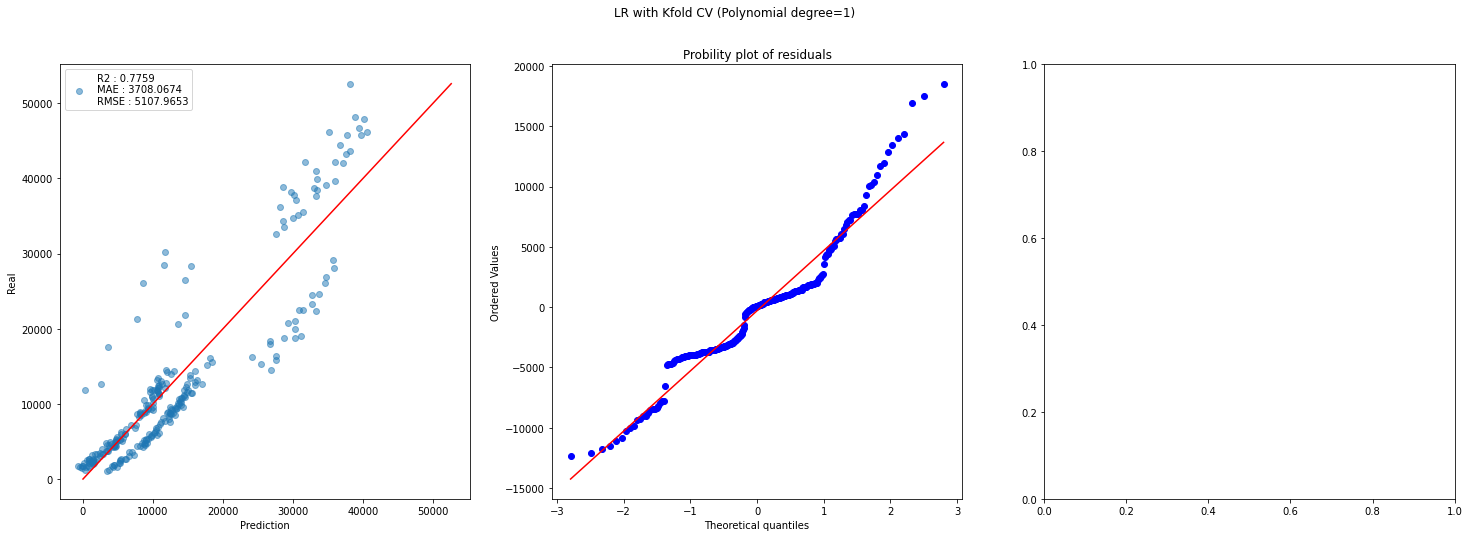

In [7]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

print("LR with Kfold CV (Polynomial degree=1)")
print("="*50)
print()
PolynomialFeatures_degree = 1
model = make_pipeline(preprocessor, PolynomialFeatures(degree=PolynomialFeatures_degree), LinearRegression()    )


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

model.fit(X_train, y_train)
Model_score_test = model.score(X_test, y_test)
Model_score_training = model.score(X_train, y_train)

R2, MAE, RMSE, y_pred = my_functions.get_metrics(model, y_test = y_test, X_test = X_test)
metrics.append(["LR with Kfold CV (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, Model_score_training, "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)])

print(metrics[0])

my_functions.plot_regression_results('LR with Kfold CV (Polynomial degree=1)', model, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=False)

LR with Kfold CV (Polynomial degree=2)

[0.80987905 0.78670624 0.89943238 0.84175969 0.8596206 ]
CV Accuracy: 0.84 (+/- 0.08)
['LR with Kfold CV (Polynomial degree=2)', 0.908, 2059.129706492537, 3441.722650309003, 0.9178286450802429, 0.8612314940713752, '0.84 (+/- 0.08)']


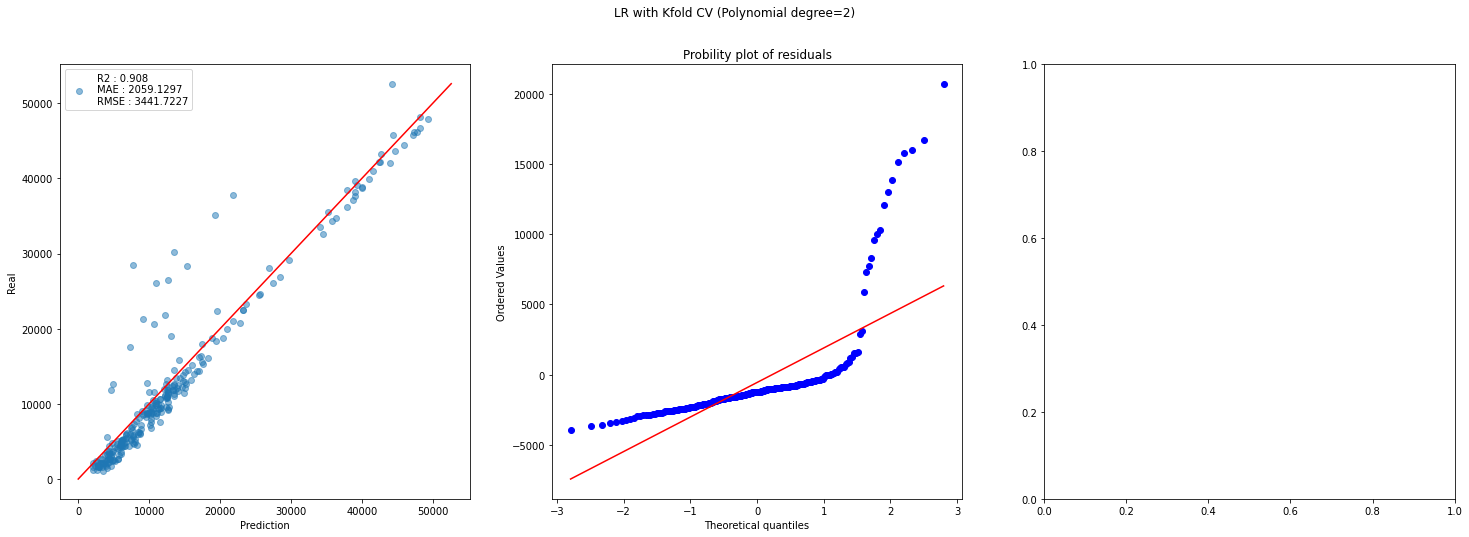

In [8]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

print("LR with Kfold CV (Polynomial degree=2)")
print("="*50)
print()
PolynomialFeatures_degree = 2
model = make_pipeline(preprocessor, PolynomialFeatures(degree=PolynomialFeatures_degree), LinearRegression()    )


kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(model, X_train, y_train, cv=kfold)
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

model.fit(X_train, y_train)
Model_score_test = model.score(X_test, y_test)
Model_score_training = model.score(X_train, y_train)

R2, MAE, RMSE, y_pred = my_functions.get_metrics(model, y_test = y_test, X_test = X_test)
metrics.append(["LR with Kfold CV (Polynomial degree=2)", R2, MAE, RMSE, Model_score_test, Model_score_training, "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2)])

print(metrics[1])


my_functions.plot_regression_results('LR with Kfold CV (Polynomial degree=2)', model, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=False)

In [9]:
################################
################################
#
# Get best Hypermarameters
#
################################
################################


preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

# my_functions.get_best_params(PolynomialFeatures_degree = 2,  model=Lasso(max_iter=100000, tol=0.0001,random_state=42, selection='cyclic'),   param_grid= {'lasso__alpha': np.linspace(0.01,100,1000)}, preprocessor = preprocessor, X_train = X_train, y_train = y_train)

LASSO with PolynomialFeatures(degree=1)

Lasso best alpha =  75.6781081081081
time to find best alpha : 1min 10.6s
[0.7072804  0.69097546 0.77514219 0.70710401 0.76321187]
CV Accuracy: 0.73 (+/- 0.07)
Lasso Score with PolynomialFeatures(degree=1) : 0.8202293518262205
['LASSO (Polynomial degree=1)', 0.7665, 3631.8007564067834, 5090.67109056093, 0.8202293518262205, 0.7384077362792947, '0.73 (+/- 0.07)', 'Best_alpha : 75.678']


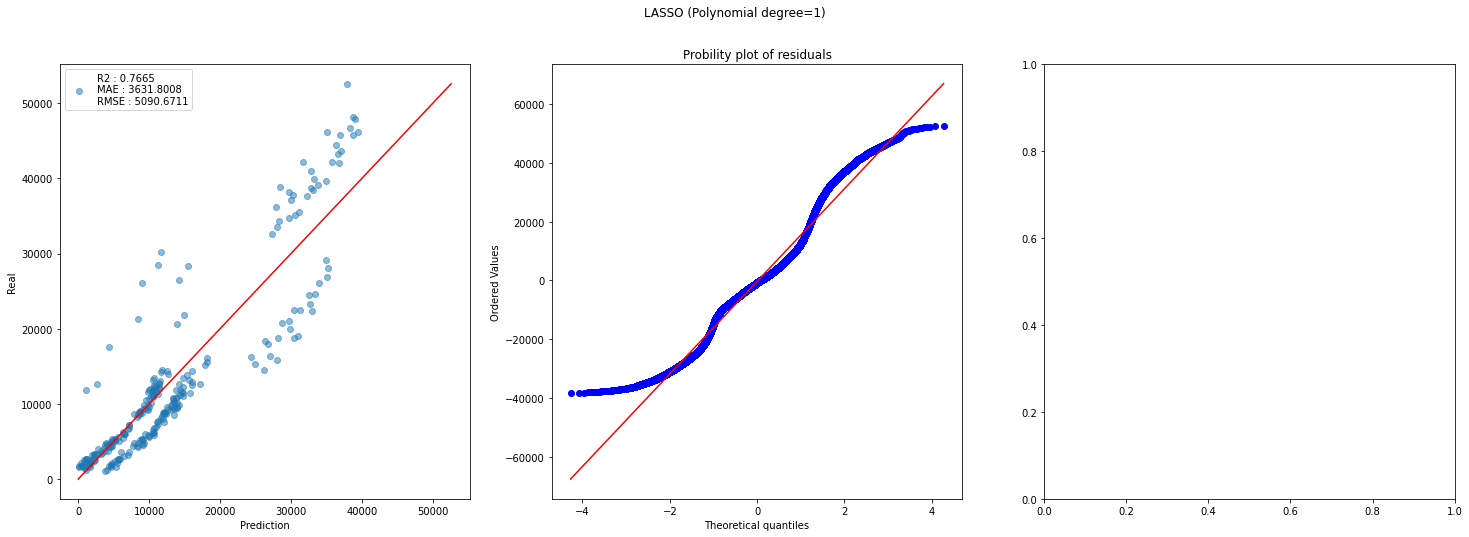

In [10]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)


print("LASSO with PolynomialFeatures(degree=1)")
print("="*50)
print()
#model = make_pipeline(preprocessor, PolynomialFeatures(degree=1), Lasso(max_iter=100000, tol=0.0001,random_state=42, selection='cyclic'))
#param_grid = {'lasso__alpha': np.linspace(0.01,100,1000)}
#grid_search = GridSearchCV(model, param_grid, cv=5)
#grid_search.fit(X_train, y_train)
#best_params = grid_search.best_params_
#print(best_params)
#model = grid_search.best_estimator_


print('Lasso best alpha =  75.6781081081081')
print("time to find best alpha : 1min 10.6s")
#best={'lasso__alpha': 75.6781081081081}
Best_alpha = 75.6781081081081
model_parameters = Lasso(alpha=Best_alpha, max_iter=100000,random_state=42)
PolynomialFeatures_degree = 1

Lasso_model_PolynomialFeatures_1 = make_pipeline(preprocessor, PolynomialFeatures(degree=PolynomialFeatures_degree), model_parameters)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(Lasso_model_PolynomialFeatures_1, X_train, y_train, cv=kfold)
print(scores)
print("CV Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Lasso_model_PolynomialFeatures_1.fit(X_train, y_train)

Model_score_test = Lasso_model_PolynomialFeatures_1.score(X_test, y_test)
Model_score_training = Lasso_model_PolynomialFeatures_1.score(X_train, y_train)
print(f"Lasso Score with PolynomialFeatures(degree=1) : {Model_score_test}")


R2, MAE, RMSE, y_pred = my_functions.get_metrics(Lasso_model_PolynomialFeatures_1, y_test = y_test, X_test = X_test)

metrics.append(["LASSO (Polynomial degree=1)", R2, MAE, RMSE, Model_score_test, Model_score_training ,"%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), f"Best_alpha : {round(Best_alpha,3)}"])

print(metrics[2])

my_functions.plot_regression_results('LASSO (Polynomial degree=1)', Lasso_model_PolynomialFeatures_1, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=False)

LASSO with PolynomialFeatures(degree=2)

Lasso best alpha =  43.84945945945945
time to find best alpha : 10min 27.6s
[0.7072804  0.69097546 0.77514219 0.70710401 0.76321187]
Lasso Score with PolynomialFeatures(degree=2) : 0.9226943483692917
['LASSO (Polynomial degree=2)', 0.9124, 1958.1224519928237, 3338.268531727755, 0.9226943483692917, 0.8580429963842563, '0.73 (+/- 0.07)', 'Best_alpha : 43.849']


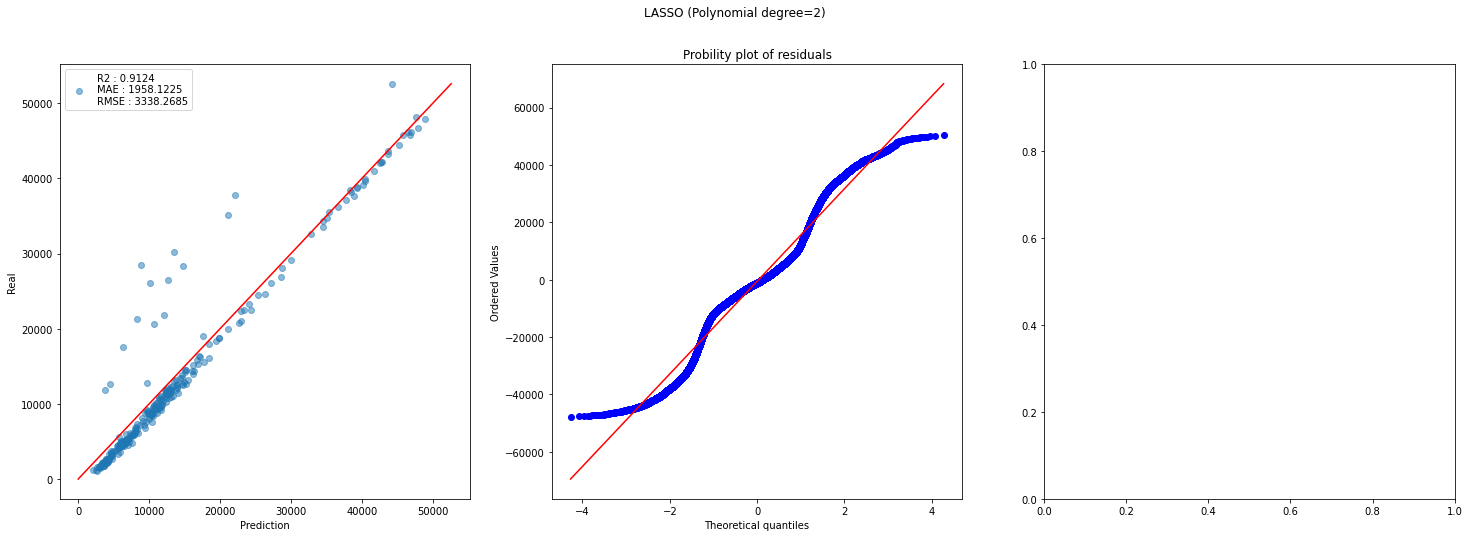

In [11]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

print("LASSO with PolynomialFeatures(degree=2)")
print("="*50)
print()



print('Lasso best alpha =  43.84945945945945')
print("time to find best alpha : 10min 27.6s")
#best={'lasso__alpha': 43.84945945945945}
Best_alpha = 43.84945945945945
model_parameters = Lasso(alpha=Best_alpha, max_iter=100000,random_state=42)
PolynomialFeatures_degree = 2

Lasso_model = make_pipeline(preprocessor, PolynomialFeatures(degree=PolynomialFeatures_degree), model_parameters)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(Lasso_model_PolynomialFeatures_1, X_train, y_train, cv=kfold)
print(scores)

Lasso_model.fit(X_train, y_train)

Model_score_test = Lasso_model.score(X_test, y_test)
Model_score_training = Lasso_model.score(X_train, y_train)
print(f"Lasso Score with PolynomialFeatures(degree=2) : {Model_score_test}")

R2, MAE, RMSE, y_pred = my_functions.get_metrics(Lasso_model, y_test = y_test, X_test = X_test)
metrics.append(["LASSO (Polynomial degree=2)",R2, MAE, RMSE, Model_score_test, Model_score_training, "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), f"Best_alpha : {round(Best_alpha,3)}"])

print(metrics[3])

my_functions.plot_regression_results('LASSO (Polynomial degree=2)', Lasso_model, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=False)

In [12]:
#preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

#best = my_functions.get_best_params(PolynomialFeatures_degree = 1,  model=Ridge(max_iter=100000, tol=0.0001,random_state=42),   param_grid= {'ridge__alpha': np.linspace(0.01,100,1000)}, preprocessor = preprocessor, X_train = X_train, y_train = y_train, )
#best

Ridg with PolynomialFeatures(degree=1)

Ridg best alpha =  2.712432432432432
time to find best alpha : 2min 12.2s
[0.70389843 0.69070308 0.77566967 0.70758609 0.76353048]
Ridg Score with PolynomialFeatures(degree=1) : 0.8190378560057868
['Ridg (Polynomial degree=1)', 0.7728, 3705.8334432011793, 5107.5133732281665, 0.8190378560057868, 0.7396525264975451, '0.73 (+/- 0.07)', 'Best_alpha : 2.712']


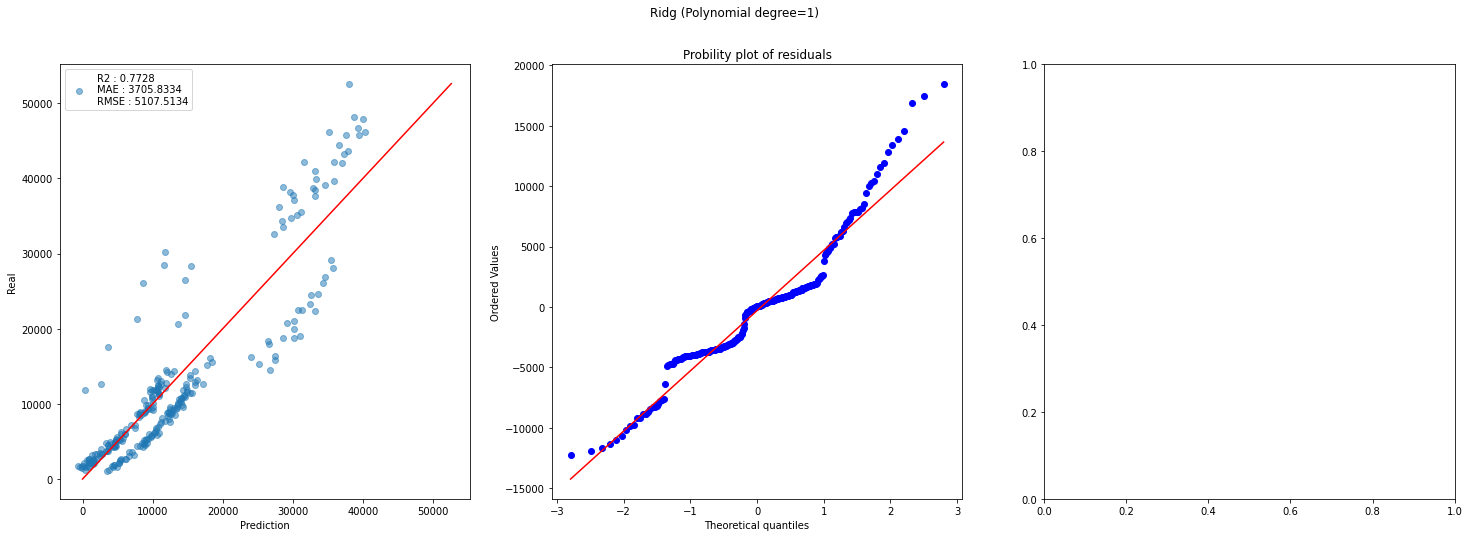

In [13]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

print("Ridg with PolynomialFeatures(degree=1)")
print("="*50)
print()



print('Ridg best alpha =  2.712432432432432')
print("time to find best alpha : 2min 12.2s")
#best={'ridge__alpha': 2.712432432432432}
Best_alpha = 2.712432432432432
model_parameters = Ridge(alpha=Best_alpha, max_iter=100000,random_state=42)
PolynomialFeatures_degree = 1

Ridg_model = make_pipeline(preprocessor, PolynomialFeatures(degree=PolynomialFeatures_degree), model_parameters)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(Ridg_model, X_train, y_train, cv=kfold)
print(scores)

Ridg_model.fit(X_train, y_train)
Model_score_test = Ridg_model.score(X_test, y_test)
Model_score_training = Ridg_model.score(X_train, y_train)
print(f"Ridg Score with PolynomialFeatures(degree=1) : {Model_score_test}")

R2, MAE, RMSE, y_pred = my_functions.get_metrics(Ridg_model, y_test = y_test, X_test = X_test)
metrics.append(["Ridg (Polynomial degree=1)",R2, MAE, RMSE, Model_score_test, Model_score_training, "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), f"Best_alpha : {round(Best_alpha,3)}"])

print(metrics[4])

my_functions.plot_regression_results('Ridg (Polynomial degree=1)', Ridg_model, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=False)

In [14]:
#preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

#best = my_functions.get_best_params(PolynomialFeatures_degree = 2,  model=Ridge(max_iter=100000, tol=0.0001,random_state=42),   param_grid= {'ridge__alpha': np.linspace(0.01,100,1000)}, preprocessor = preprocessor, X_train = X_train, y_train = y_train)
#best

Ridg with PolynomialFeatures(degree=2)

Ridg best alpha =  9.718738738738738
time to find best alpha : 1min 24.8s
[0.81538948 0.79768381 0.90462156 0.83731847 0.86467017]
Ridg Score with PolynomialFeatures(degree=2) : 0.9202086747323108
['Ridg (Polynomial degree=2)', 0.9096, 2005.5673802663052, 3391.512992432235, 0.9202086747323108, 0.8602477842375272, '0.84 (+/- 0.08)', 'Best_alpha : 9.719']


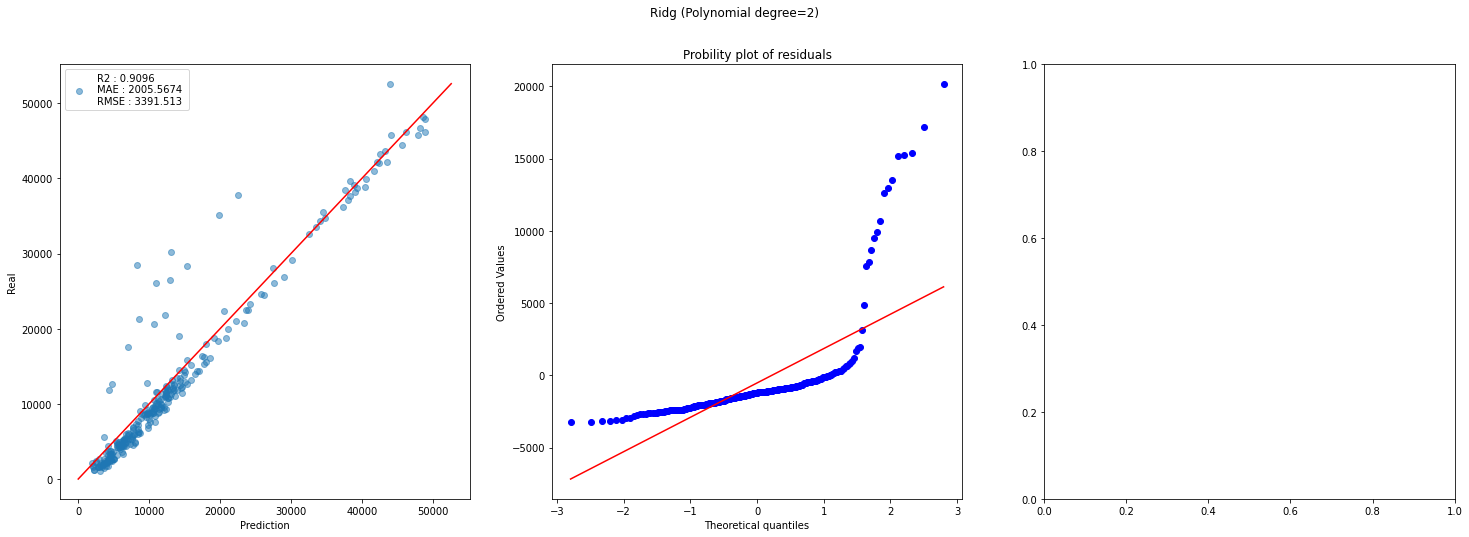

In [15]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

print("Ridg with PolynomialFeatures(degree=2)")
print("="*50)
print()



print('Ridg best alpha =  9.718738738738738')
print("time to find best alpha : 1min 24.8s")
#best={'ridge__alpha': 9.718738738738738}
Best_alpha = 9.718738738738738
model_parameters = Ridge(alpha=Best_alpha, max_iter=100000,random_state=42)
PolynomialFeatures_degree = 2

Ridg_model = make_pipeline(preprocessor, PolynomialFeatures(degree=PolynomialFeatures_degree), model_parameters)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(Ridg_model, X_train, y_train, cv=kfold)
print(scores)

Ridg_model.fit(X_train, y_train)
Model_score_test = Ridg_model.score(X_test, y_test)
Model_score_training = Ridg_model.score(X_train, y_train)

print(f"Ridg Score with PolynomialFeatures(degree=2) : {Model_score_test}")

R2, MAE, RMSE, y_pred = my_functions.get_metrics(Ridg_model, y_test = y_test, X_test = X_test)
metrics.append(["Ridg (Polynomial degree=2)",R2, MAE, RMSE, Model_score_test, Model_score_training, "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), f"Best_alpha : {round(Best_alpha,3)}"])

print(metrics[5])

my_functions.plot_regression_results('Ridg (Polynomial degree=2)', Ridg_model, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=False)

In [16]:
#preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

#best = my_functions.get_best_params(PolynomialFeatures_degree = 3,  model=Ridge(max_iter=100000, tol=0.0001,random_state=42),   param_grid= {'ridge__alpha': np.linspace(0.01,500,1000)}, preprocessor = preprocessor, X_train = X_train, y_train = y_train)
#best

Ridg with PolynomialFeatures(degree=3)

Ridg best alpha =  125.63311311311313
time to find best alpha : 4min 31.5s
[0.80563626 0.79006903 0.90179889 0.83499949 0.85949964]
Ridg Score with PolynomialFeatures(degree=3) : 0.913500348991591
['Ridg (Polynomial degree=3)', 0.902, 2140.28222452143, 3531.2041283829117, 0.913500348991591, 0.8660314429034418, '0.84 (+/- 0.08)', 'Best_alpha : 125.633']


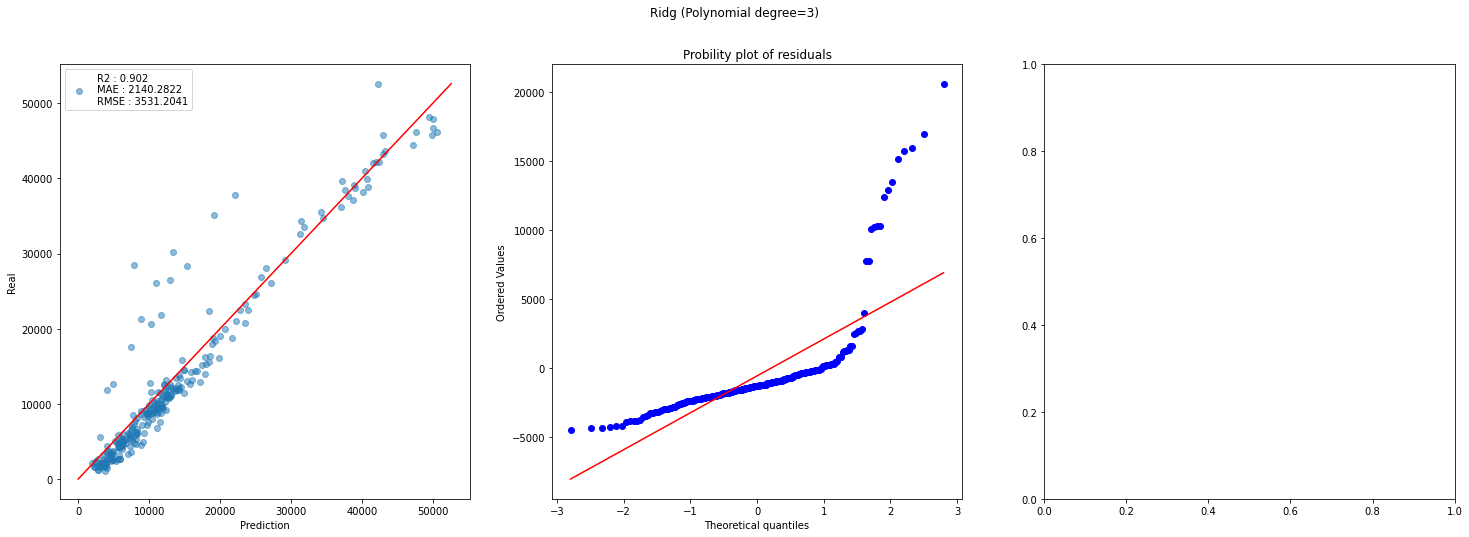

In [17]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

print("Ridg with PolynomialFeatures(degree=3)")
print("="*50)
print()



print('Ridg best alpha =  125.63311311311313')
print("time to find best alpha : 4min 31.5s")
#best={'ridge__alpha': 125.63311311311313}
Best_alpha = 125.63311311311313
model_parameters = Ridge(alpha=Best_alpha, max_iter=100000,random_state=42)
PolynomialFeatures_degree = 3

Ridg_model = make_pipeline(preprocessor, PolynomialFeatures(degree=PolynomialFeatures_degree), model_parameters)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(Ridg_model, X_train, y_train, cv=kfold)
print(scores)

Ridg_model.fit(X_train, y_train)
Model_score_test = Ridg_model.score(X_test, y_test)
Model_score_training = Ridg_model.score(X_train, y_train)
print(f"Ridg Score with PolynomialFeatures(degree=3) : {Model_score_test}")

R2, MAE, RMSE, y_pred = my_functions.get_metrics(Ridg_model, y_test = y_test, X_test = X_test)
metrics.append(["Ridg (Polynomial degree=3)",R2, MAE, RMSE, Model_score_test, Model_score_training, "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), f"Best_alpha : {round(Best_alpha,3)}"])

print(metrics[6])

my_functions.plot_regression_results('Ridg (Polynomial degree=3)', Ridg_model, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=False)

In [18]:
#preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

# best = my_functions.get_best_params(PolynomialFeatures_degree = 1,  model=ElasticNet(max_iter=100000, tol=0.0001,random_state=42),   param_grid = {'elasticnet__alpha': np.linspace(0.01, 1, 100), 'elasticnet__l1_ratio': np.linspace(0, 1, 100)}, preprocessor = preprocessor, X_train = X_train, y_train = y_train)


ElasticNet with PolynomialFeatures(degree=1)

ElasticNet best alpha =  0.32
ElasticNet best elasticnet__l1_ratio =  0.32
time to find best alpha and elasticnet__l1_ratio : 18min 38.1s
[0.70392897 0.69069187 0.77567544 0.70759237 0.76350081]
ElasticNet Score with PolynomialFeatures(degree=1) : 0.8190414618382218
['ElasticNet (Polynomial degree=1)', 0.7719, 3704.784163807046, 5107.4624870905445, 0.8190414618382218, 0.7396251902655893, '0.73 (+/- 0.07)', 'Best_alpha : 0.32, Best_l1_ratio : 0.99']


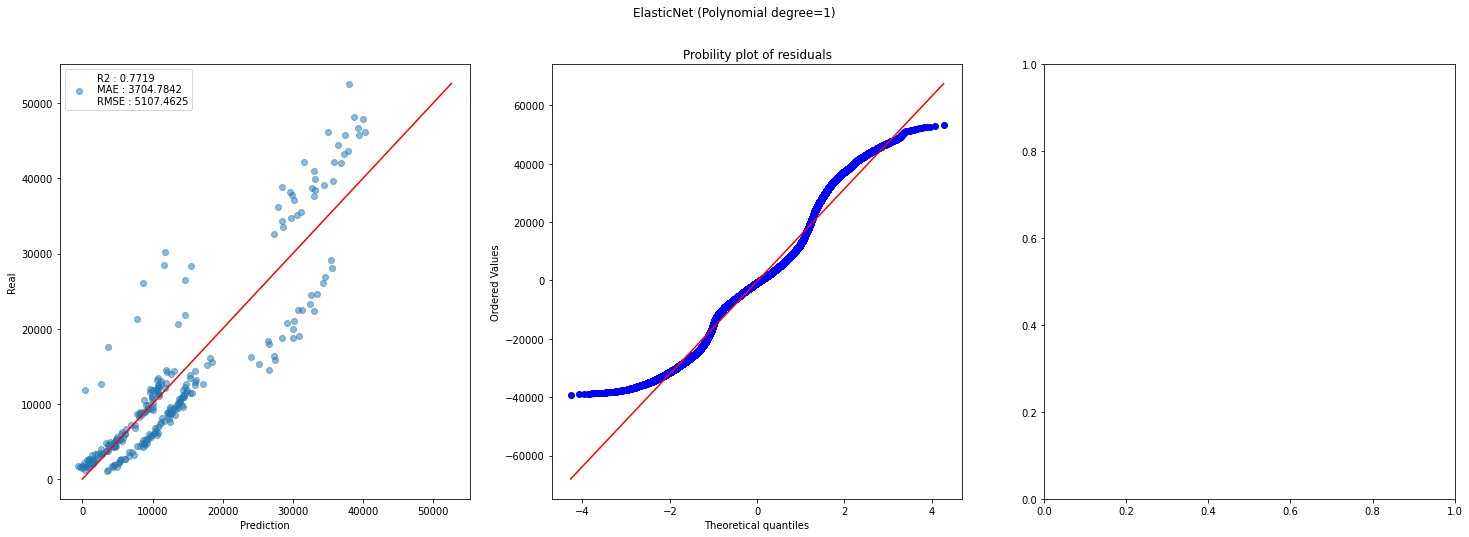

In [19]:
preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

print("ElasticNet with PolynomialFeatures(degree=1)")
print("="*50)
print()



print('ElasticNet best alpha =  0.32')
print('ElasticNet best elasticnet__l1_ratio =  0.32')

print("time to find best alpha and elasticnet__l1_ratio : 18min 38.1s")
#{'elasticnet__alpha': 0.32, 'elasticnet__l1_ratio': 0.98989898989899}
elasticnet__alpha = 0.32
elasticnet__l1_ratio = 0.98989898989899
model_parameters = ElasticNet(alpha=elasticnet__alpha,l1_ratio=elasticnet__l1_ratio,  max_iter=100000,random_state=42)
PolynomialFeatures_degree = 1

ElasticNet_model = make_pipeline(preprocessor, PolynomialFeatures(degree=PolynomialFeatures_degree), model_parameters)

kfold = KFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(ElasticNet_model, X_train, y_train, cv=kfold)
print(scores)

ElasticNet_model.fit(X_train, y_train)
Model_score_test = ElasticNet_model.score(X_test, y_test)
Model_score_training = ElasticNet_model.score(X_train, y_train)
print(f"ElasticNet Score with PolynomialFeatures(degree=1) : {Model_score_test}")

R2, MAE, RMSE, y_pred = my_functions.get_metrics(ElasticNet_model, y_test = y_test, X_test = X_test)
metrics.append(["ElasticNet (Polynomial degree=1)",R2, MAE, RMSE, Model_score_test, Model_score_training, "%0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2), f"Best_alpha : {round(elasticnet__alpha,3)}, Best_l1_ratio : {round(elasticnet__l1_ratio,3)}"])

print(metrics[7])

my_functions.plot_regression_results('ElasticNet (Polynomial degree=1)', ElasticNet_model, y_train, X_train, y_pred, y_test, R2, MAE, RMSE, include_learning_curve=False)

In [20]:
# preprocessor, X_train, X_test, y_train, y_test = make_pipeline_to_ML(X,y)

#best = my_functions.get_best_params(PolynomialFeatures_degree = 2,  model=ElasticNet(max_iter=100000, tol=0.0001,random_state=42),   param_grid = {'elasticnet__alpha': np.linspace(0.01, 1, 100), 'elasticnet__l1_ratio': np.linspace(0, 1, 100)}, preprocessor = preprocessor, X_train = X_train, y_train = y_train)


In [21]:
df_result = pd.DataFrame(metrics , columns=['Model' , 'R2' , 'MAE' , 'RMSE', 'Score (test)', 'Score (trainging)' , "CV Accuracy", 'HyperParamter']).sort_values(['MAE' , 'RMSE'] , ignore_index=True).set_index('Model')
df_result

,R2,MAE,RMSE,Score (test),Score (trainging),CV Accuracy,HyperParamter
Model,,,,,,,
LASSO (Polynomial degree=2),0.9124,1958.122452,3338.268532,0.922694,0.858043,0.73 (+/- 0.07),Best_alpha : 43.849
Ridg (Polynomial degree=2),0.9096,2005.567380,3391.512992,0.920209,0.860248,0.84 (+/- 0.08),Best_alpha : 9.719
LR with Kfold CV (Polynomial degree=2),0.9080,2059.129706,3441.722650,0.917829,0.861231,0.84 (+/- 0.08),None
Ridg (Polynomial degree=3),0.9020,2140.282225,3531.204128,0.913500,0.866031,0.84 (+/- 0.08),Best_alpha : 125.633
LASSO (Polynomial degree=1),0.7665,3631.800756,5090.671091,0.820229,0.738408,0.73 (+/- 0.07),Best_alpha : 75.678
ElasticNet (Polynomial degree=1),0.7719,3704.784164,5107.462487,0.819041,0.739625,0.73 (+/- 0.07),"Best_alpha : 0.32, Best_l1_ratio : 0.99"
Ridg (Polynomial degree=1),0.7728,3705.833443,5107.513373,0.819038,0.739653,0.73 (+/- 0.07),Best_alpha : 2.712
LR with Kfold CV (Polynomial degree=1),0.7759,3708.067361,5107.965335,0.819006,0.739695,0.73 (+/- 0.07),None
